# **Time Series of 2018 Heat Index in Munoz, Nueva Ecjia**

**Prepared By:** Jann Rovic Cueto

**University:** Rizal Technological University

**References:**
- ACF/PACF - https://towardsdatascience.com/significance-of-acf-and-pacf-plots-in-time-series-analysis-2fa11a5d10a8

- ADF - https://medium.com/@cmukesh8688/why-is-augmented-dickey-fuller-test-adf-test-so-important-in-time-series-analysis-6fc97c6be2f0

**Change this with your actual group information download the notebook tpos lagay nyo sa drive nyo para maload nyo sya true google colab.**

**What is Stationarity?**

Some time-series models, such as such as ARIMA, assume that the underlying data is stationary. Stationarity describes that the time-series has

- constant mean and mean is not time-dependent
- constant variance and variance is not time-dependent
- constant covariance and covariance is not time-dependent
> If a time series has a specific (stationary) behavior over a given time interval, then it can be assumed that the time series will behave the same at a later time.

Time series with trend and/or seasonality are not stationary. Trend indicates that the mean is not constant over time and seasonality indicates that the variance is not constant over time.


The check for stationarity can be done via three different approaches:

> 1.) visually: plot time series and check for trends or seasonality

> 2.) basic statistics: split time series and compare the mean and variance of each partition

> 3.) statistical test: Augmented Dickey Fuller test

Let's do the visual check first. We can see that all features except Temperature have non-constant mean and non-constant variance. Therefore, none of these seem to be stationary. However, Temperature shows strong seasonality (hot in summer, cold in winter) and therefore it is not stationary either.

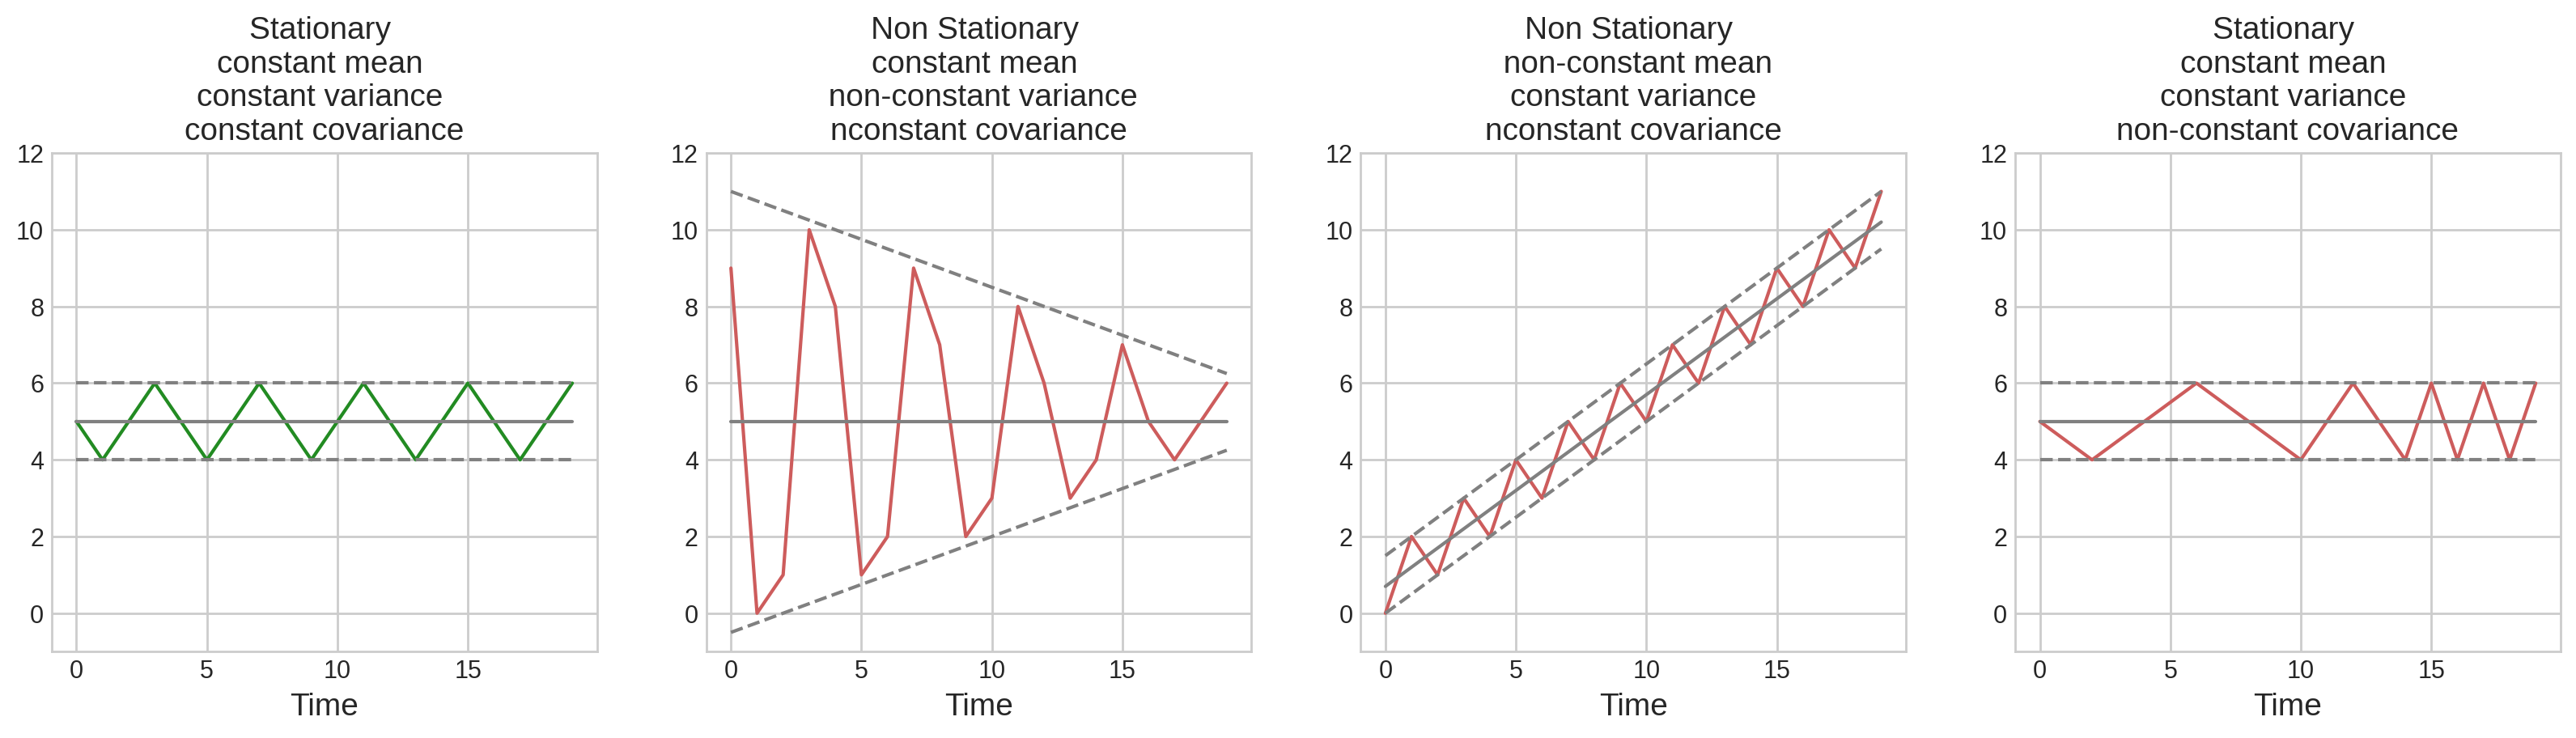

In [4]:
t = np.linspace(0, 19, 20)

fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(20,4))
stationary = [5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6, 5, 4, 5, 6,]
sns.lineplot(x=t, y=stationary, ax=ax[0], color='forestgreen')
sns.lineplot(x=t, y=5, ax=ax[0], color='grey')
sns.lineplot(x=t, y=6, ax=ax[0], color='grey')
sns.lineplot(x=t, y=4, ax=ax[0], color='grey')
ax[0].lines[2].set_linestyle("--")
ax[0].lines[3].set_linestyle("--")
ax[0].set_title(f'Stationary \nconstant mean \nconstant variance \nconstant covariance', fontsize=14)

nonstationary1 = [ 9, 0, 1, 10, 8, 1, 2, 9, 7, 2, 3, 8, 6, 3, 4, 7, 5, 4, 5, 6]
sns.lineplot(x=t, y=nonstationary1, ax=ax[1], color='indianred' )
sns.lineplot(x=t, y=5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*0.25-0.5, ax=ax[1], color='grey')
sns.lineplot(x=t, y=t*(-0.25)+11, ax=ax[1], color='grey')
ax[1].lines[2].set_linestyle("--")
ax[1].lines[3].set_linestyle("--")
ax[1].set_title(f'Non Stationary \nconstant mean \n non-constant variance\nnconstant covariance', fontsize=14)

nonstationary2 = [0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8, 10, 9, 11,]
sns.lineplot(x=t, y=nonstationary2, ax=ax[2], color='indianred' )
sns.lineplot(x=t, y=t*0.5+0.7, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5, ax=ax[2], color='grey')
sns.lineplot(x=t, y=t*0.5+1.5, ax=ax[2], color='grey')
ax[2].lines[2].set_linestyle("--")
ax[2].lines[3].set_linestyle("--")
ax[2].set_title(f'Non Stationary \n non-constant mean\nconstant variance\nnconstant covariance', fontsize=14)

nonstationary3 = [5, 4.5, 4, 4.5, 5, 5.5, 6, 5.5, 5, 4.5, 4, 5, 6, 5, 4, 6, 4, 6, 4, 6,]
sns.lineplot(x=t, y=nonstationary3, ax=ax[3], color='indianred')
sns.lineplot(x=t, y=5, ax=ax[3], color='grey')
sns.lineplot(x=t, y=6, ax=ax[3], color='grey')
sns.lineplot(x=t, y=4, ax=ax[3], color='grey')
ax[3].lines[2].set_linestyle("--")
ax[3].lines[3].set_linestyle("--")
ax[3].set_title(f'Stationary \nconstant mean \nconstant variance \nnon-constant covariance', fontsize=14)

for i in range(4):
    ax[i].set_ylim([-1, 12])
    ax[i].set_xlabel('Time', fontsize=14)

In [3]:
# Magic function that will make your plot outputs appear and be stored within the notebook
%matplotlib inline

# Function used to to render higher resolution images
%config InlineBackend.figure_format = 'retina'

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")


# Data manipulation
import os
import pandas as pd
import numpy as np
from datetime import datetime, date

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Standardizing the style for the visualizations
sns.set_theme()
sns.set_palette("pastel")
plt.style.use('seaborn-whitegrid')

#Uploading from the device
#Uploading from the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Pre-Heat Index Analysis 2018**

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Hortaleza/METEO/Munoz_2018.csv')
df.head()

,date,avetemp,rh
0,01/01/2018,25.50,67
1,02/01/2018,26.00,62
2,03/01/2018,25.70,83
3,04/01/2018,26.00,98
4,05/01/2018,26.15,73


# **The Heat Index Equation**

- The computation of the heat index is a refinement of a result obtained by multiple regression analysis carried out by Lans P. Rothfusz and described in a 1990 National Weather Service (NWS) Technical Attachment (SR 90-23).  The regression equation of Rothfusz is

$HI = (-42.379 + 2.04901523*T) + (10.14333127*RH) - (.22475541*T*RH) - (.00683783*T*T) - (.05481717*RH*RH) + (.00122874*T*T*RH) + (.00085282*T*RH*RH) - (.00000199*T*T*RH*RH)$

> where T is temperature in degrees F and RH is relative humidity in percent.  HI is the heat index expressed as an apparent temperature in degrees F.  If the RH is less than 13% and the temperature is between 80 and 112 degrees F, then the following adjustment is subtracted from HI:


$ ADJUSTMENT =[\frac{13-RH}{4}]^2 [\frac{(17-ABS*(T-95.))}{17}]$

> where ABS and SQRT are the absolute value and square root functions, respectively.  On the other hand, if the RH is greater than 85% and the temperature is between 80 and 87 degrees F, then the following adjustment is added to HI:

$ADJUSTMENT = [(RH-85)/10] * [(87-T)/5]$

- The Rothfusz regression is not appropriate when conditions of temperature and humidity warrant a heat index value below about 80 degrees F. In those cases, a simpler formula is applied to calculate values consistent with Steadman's results:

$ HI = 0.5 * {T + 61.0 + [(T-68.0)*1.2] + (RH*0.094)}$

- In practice, the simple formula is computed first and the result averaged with the temperature. If this heat index value is 80 degrees F or higher, the full regression equation along with any adjustment as described above is applied.

- The Rothfusz regression is not valid for extreme temperature and relative humidity conditions beyond the range of data considered by Steadman.

Click Here: [Heat Index Formula](https://www.wpc.ncep.noaa.gov/html/heatindex_equation.shtml)

**I. Data Engineering**

Data engineering allows us to create new features using the available features in the data and using different approach depends on the needs.

In [6]:
# We use the simple formula made by Rothfusz regression.
# The other formula are only use depends on the data its just for adjustment.

df['avetemp'] = pd.to_numeric(df['avetemp'], errors='coerce')  # Convert 'AVETEMP' to numeric
df['rh'] = pd.to_numeric(df['rh'], errors='coerce')  # Convert 'RH' to numeric

# Apply the formula for Heat index
df['hi'] = 0.5 * df['avetemp'] + 61.0 + ((df['avetemp'] - 68.0) * 1.2) + (df['rh'] * 0.094)
print(df)

           date  avetemp  rh      hi
0    01/01/2018    25.50  67  29.048
1    02/01/2018    26.00  62  29.428
2    03/01/2018    25.70  83  30.892
3    04/01/2018    26.00  98  32.812
4    05/01/2018    26.15  73  30.717
..          ...      ...  ..     ...
360  27/12/2018    25.05  71  28.659
361  28/12/2018    26.40  60  29.920
362  29/12/2018    26.65  67  31.003
363  30/12/2018    27.60  57  31.678
364  31/12/2018    27.30  67  32.108

[365 rows x 4 columns]


In [7]:
df

,date,avetemp,rh,hi
0,01/01/2018,25.50,67,29.048
1,02/01/2018,26.00,62,29.428
2,03/01/2018,25.70,83,30.892
3,04/01/2018,26.00,98,32.812
4,05/01/2018,26.15,73,30.717
...,...,...,...,...
360,27/12/2018,25.05,71,28.659
361,28/12/2018,26.40,60,29.920
362,29/12/2018,26.65,67,31.003
363,30/12/2018,27.60,57,31.678


In [8]:
df.describe()

,avetemp,rh,hi
count,365.000000,365.000000,365.000000
mean,28.214932,77.884932,34.686567
std,1.399643,8.108666,2.481558
min,24.200000,57.000000,26.650000
25%,27.300000,72.000000,33.299000
50%,28.250000,78.000000,34.971000
75%,29.200000,84.000000,36.578000
max,31.450000,98.000000,39.732000


In [9]:
print(df.columns)

Index(['date', 'avetemp', 'rh', 'hi'], dtype='object')


In [10]:
# Dataset length
print('The total number of rows in the dataset is: ',len(df))

The total number of rows in the dataset is:  365


The length is 365 days which means correct as in one year there's 365 days

In [11]:
# Date original data type
type(df['date'][0])

str

In [12]:
# Transforming date(str) to Timestamp format
df['date'] =pd.to_datetime(df['date'], format = '%d/%m/%Y')

In [13]:
# Table showing the number of missing values and percentage
# of missing values in the current dataset
dict = {}
for i in list(df.columns):
    dict[i] = (df[i].isnull().sum(),round(df[i].isnull().sum()/len(df)*100,2))

pd.DataFrame(dict,index=["# of missing values","% of missing values"]).transpose().sort_values(by=["# of missing values"], ascending=False)

,# of missing values,% of missing values
date,0.0,0.0
avetemp,0.0,0.0
rh,0.0,0.0
hi,0.0,0.0


**II. Data Visualization**

Plotting Time Series of Multiple Parameters

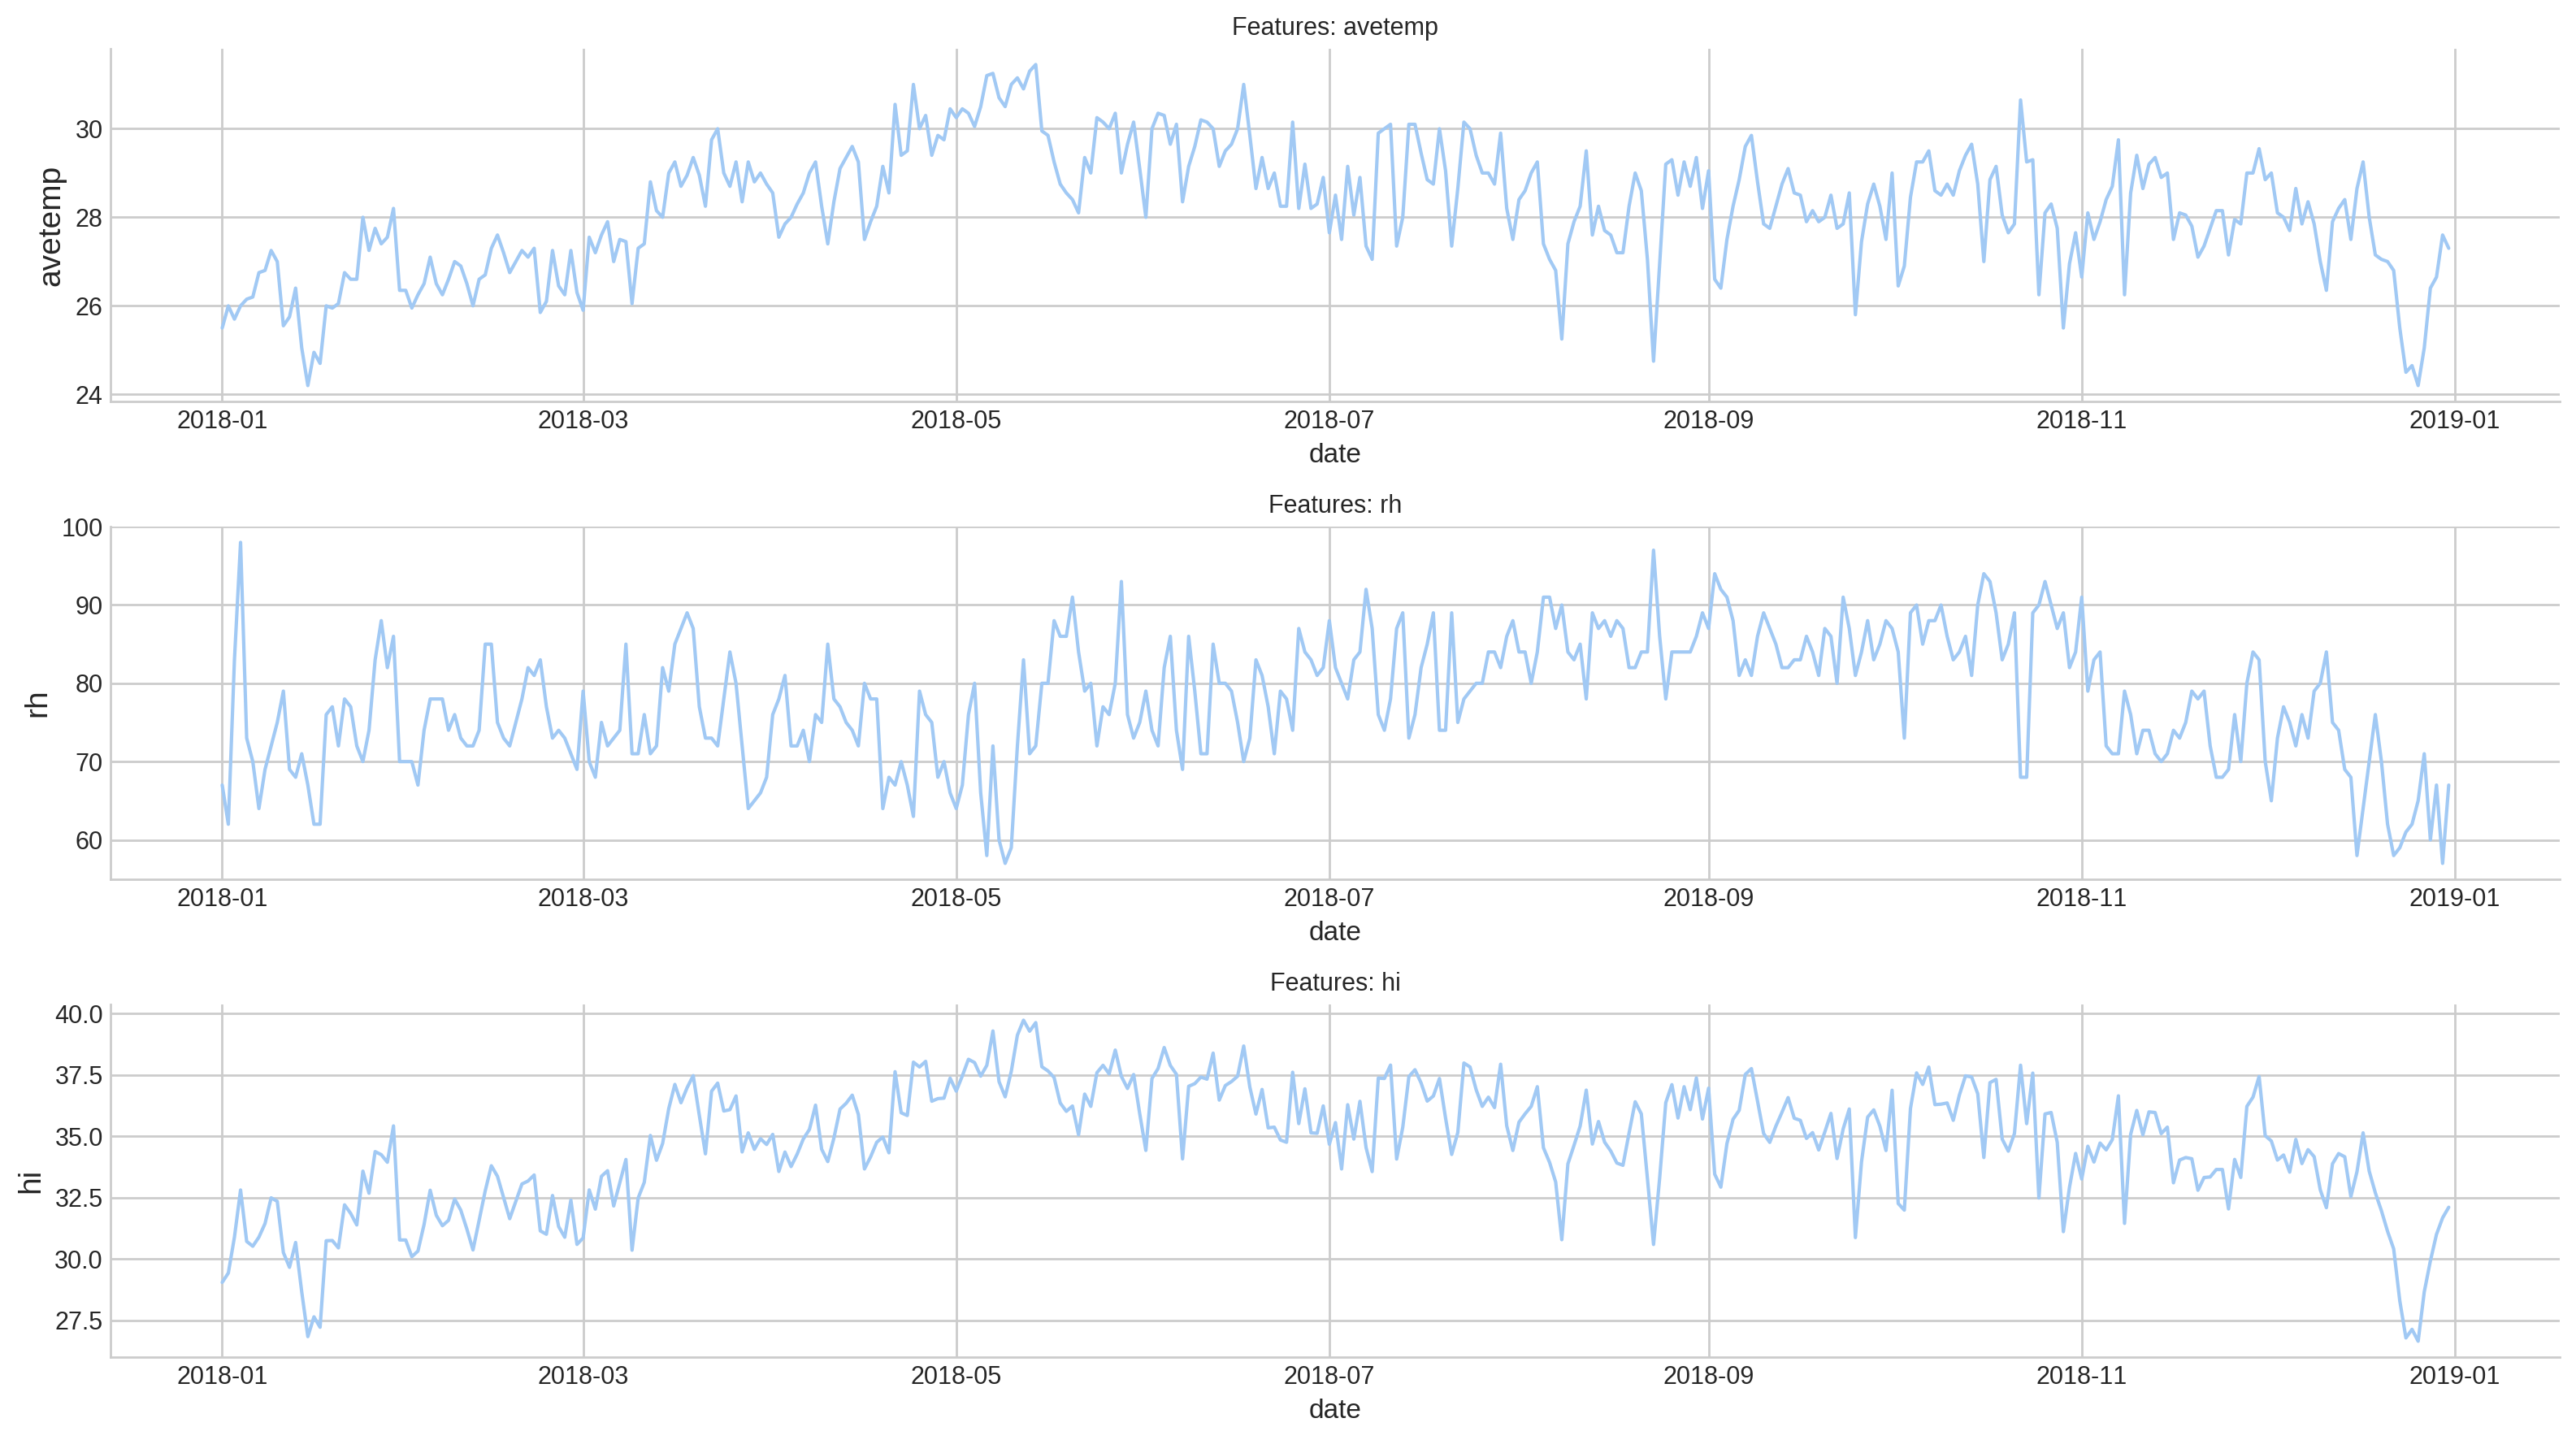

In [14]:
# Plotting each of the time series
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(16,9)) # lagi gamitin ito para macontrol and plot size figures
sns.despine()

for i, column in enumerate(df.drop('date', axis=1).columns):
    sns.lineplot(x=df['date'], y=df[column], ax=ax[i])
    ax[i].set_title('Features: {}'.format(column), fontsize=11)
    ax[i].set_ylabel(ylabel=column, fontsize=14)


plt.tight_layout()

Interpret the  correlation r values of the three parameter

**III. Exploratory Data Analyis**

Great, we are almost ready to perform an ADF test on the time series.

**Augmented Dickey-Fuller Test Statistics**

To perform the ADF test, we define a function that allows us to visualize the results:

- A green curve indicates that our ADF statistic is below 1% of the critical value (time series is stationary).

- A orange curve indicates that our ADF statistic is above 1% of the critical value but below 5% of the critical value (time series is stationary).

- A red curve indicates that our ADF statistic is above 5% of the critical value (time series is not stationary), and we need to apply transformations to make it stationary.

We perform this test to ensure that our time series is stationary and can be fed successfully into the ARIMA model.But we will not go further on that since the goal of the study is to identify  the changes from pre and post.

**Other Explanation**

- Augmented Dickey-Fuller (ADF) test is a type of statistical test called a unit root test. Unit roots are a cause for non-stationarity.

> Null Hypothesis (H0): Time series has a unit root. (Time series is not stationary).

> Alternate Hypothesis (H1): Time series has no unit root (Time series is stationary).

- If the null hypothesis can be rejected, we can conclude that the time series is stationary.

There are two ways to rejects the null hypothesis:

- On the one hand, the null hypothesis can be rejected if the p-value is below a set significance level. The defaults significance level is 5%

- p-value > significance level (default: 0.05): Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

- p-value <= significance level (default: 0.05): Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

On the other hand, the null hypothesis can be rejects if the test statistic is less than the critical value.

- ADF statistic > critical value: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.

- ADF statistic < critical value: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [15]:
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [16]:
# Function to visualize Augmented Dickey–Fuller test
def visualize_adfuller_results(series, title, ax):
    result = adfuller(series)
    significance_level = 0.05
    adf_stat = result[0]
    p_val = result[1]
    crit_val_1 = result[4]['1%']
    crit_val_5 = result[4]['5%']
    crit_val_10 = result[4]['10%']

    if (p_val < significance_level) & ((adf_stat < crit_val_1)):
        linecolor = 'forestgreen'
    elif (p_val < significance_level) & (adf_stat < crit_val_5):
        linecolor = 'orange'
    elif (p_val < significance_level) & (adf_stat < crit_val_10):
        linecolor = 'red'
    else:
        linecolor = 'purple'
    sns.lineplot(x=df['date'], y=series, ax=ax, color=linecolor)
    ax.set_title(f'ADF Statistic {adf_stat:0.3f}, p-value: {p_val:0.3f}\nCritical Values 1%: {crit_val_1:0.3f}, 5%: {crit_val_5:0.3f}, 10%: {crit_val_10:0.3f}', fontsize=14)
    ax.set_ylabel(ylabel=title, fontsize=14)

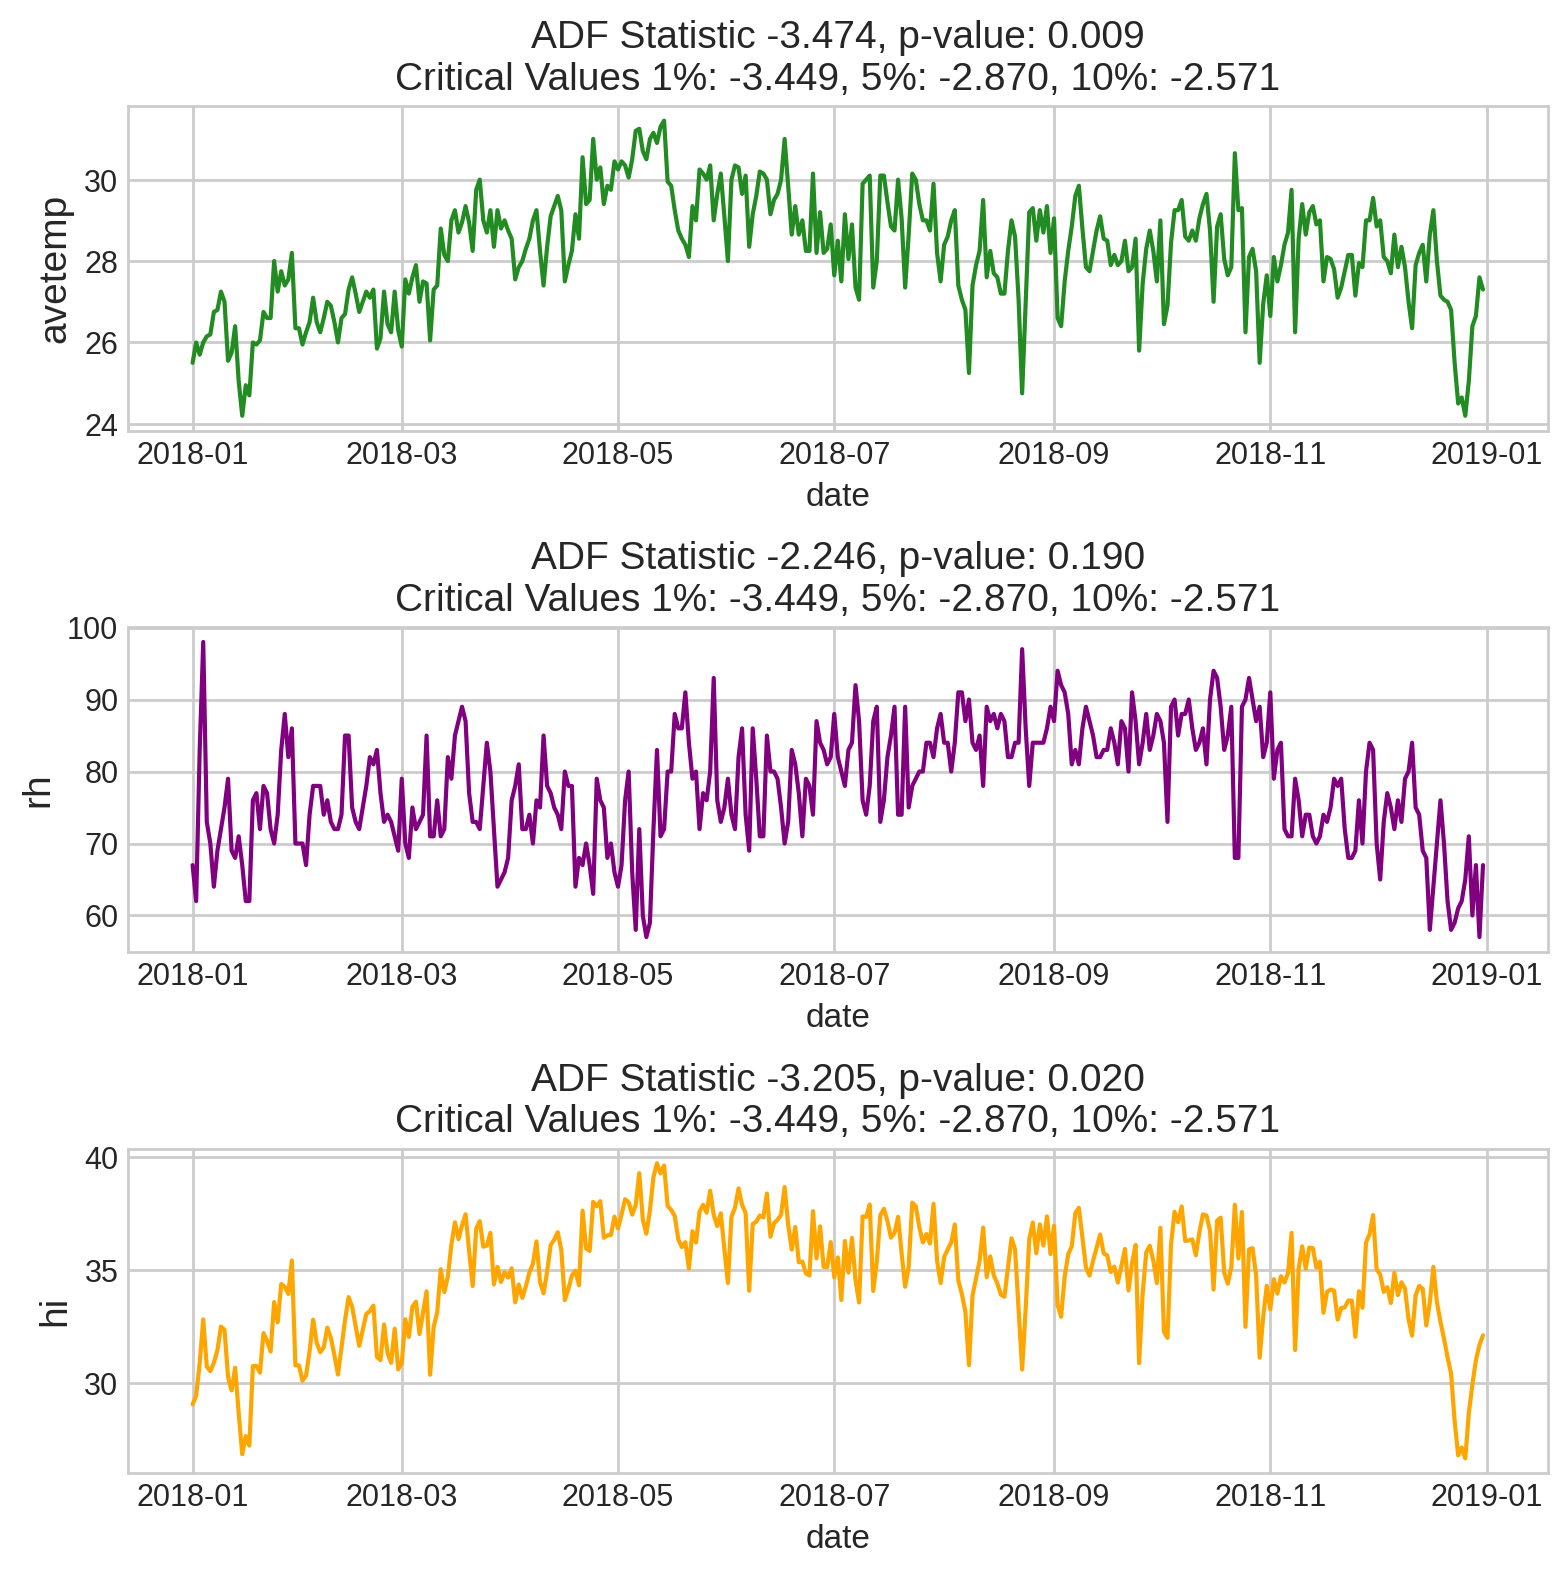

In [17]:
# Plotting Augmented Dickey–Fuller test results for each column
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(8, 8))

visualize_adfuller_results(df['avetemp'].values, 'avetemp', ax[0])
visualize_adfuller_results(df['rh'].values, 'rh', ax[1])
visualize_adfuller_results(df['hi'].values, 'hi', ax[2])

plt.tight_layout()

**Interpretation:**

# **TRANSFORMING and DIFFERENCING**

Transform and Differencing is used when the stationarity of the data does not achieve this helps to make the data stationary for the arima model but not always applicable to all situation.


<Axes: xlabel='rh', ylabel='Density'>

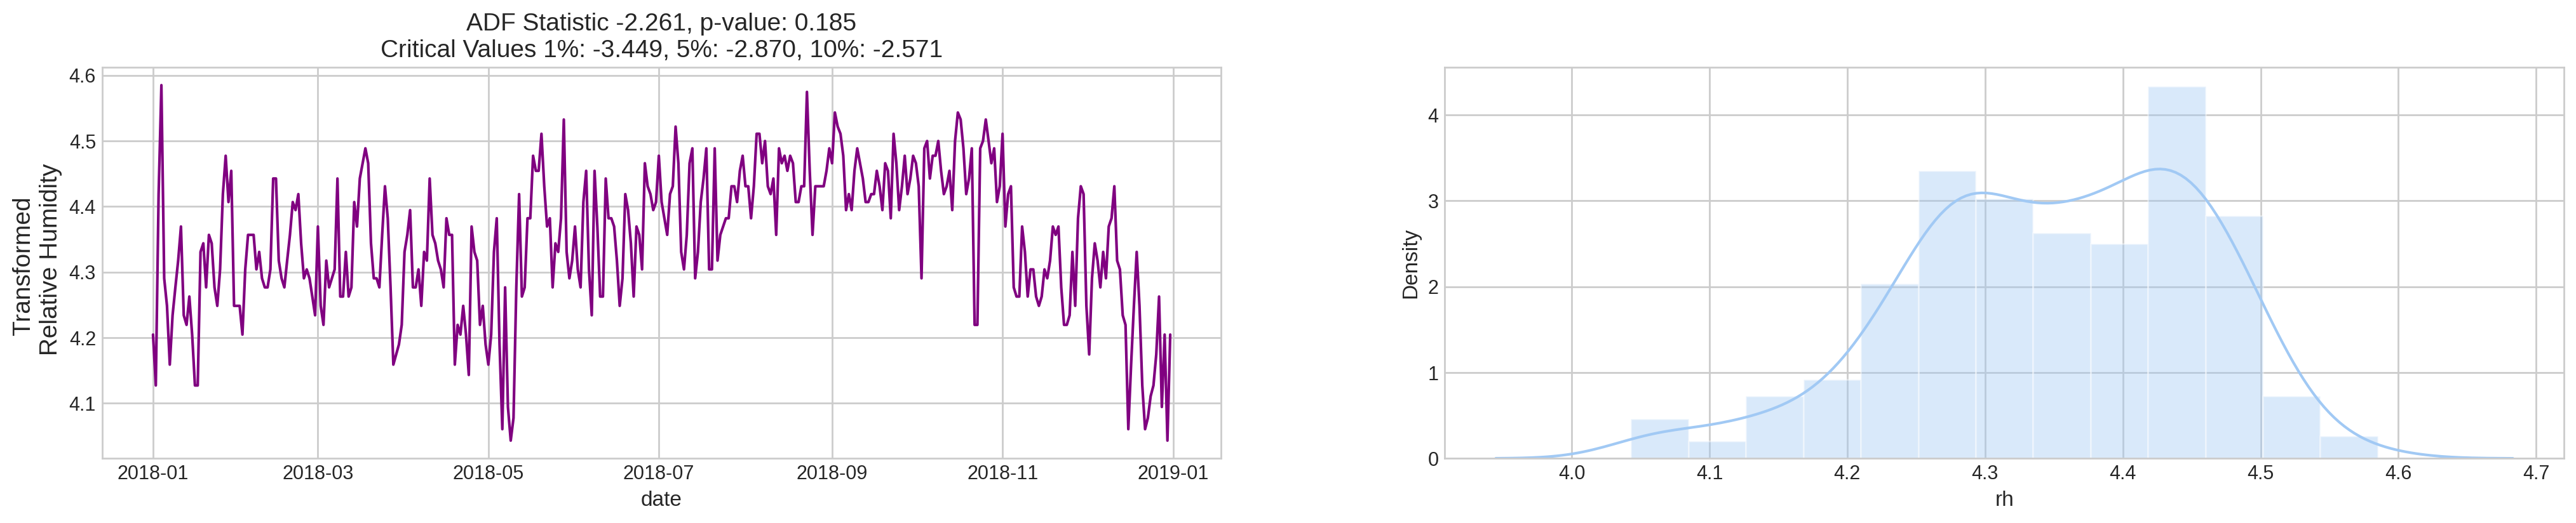

In [ ]:
# Log Transform of absolute values
# (Log transoform of negative values will return NaN)
df['rh'] = np.log(abs(df['rh']))

f, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 4))
visualize_adfuller_results(df['rh'], 'Transformed \n Relative Humidity', ax[0])
sns.distplot(df['rh'], ax=ax[1])

**Interpretation:**

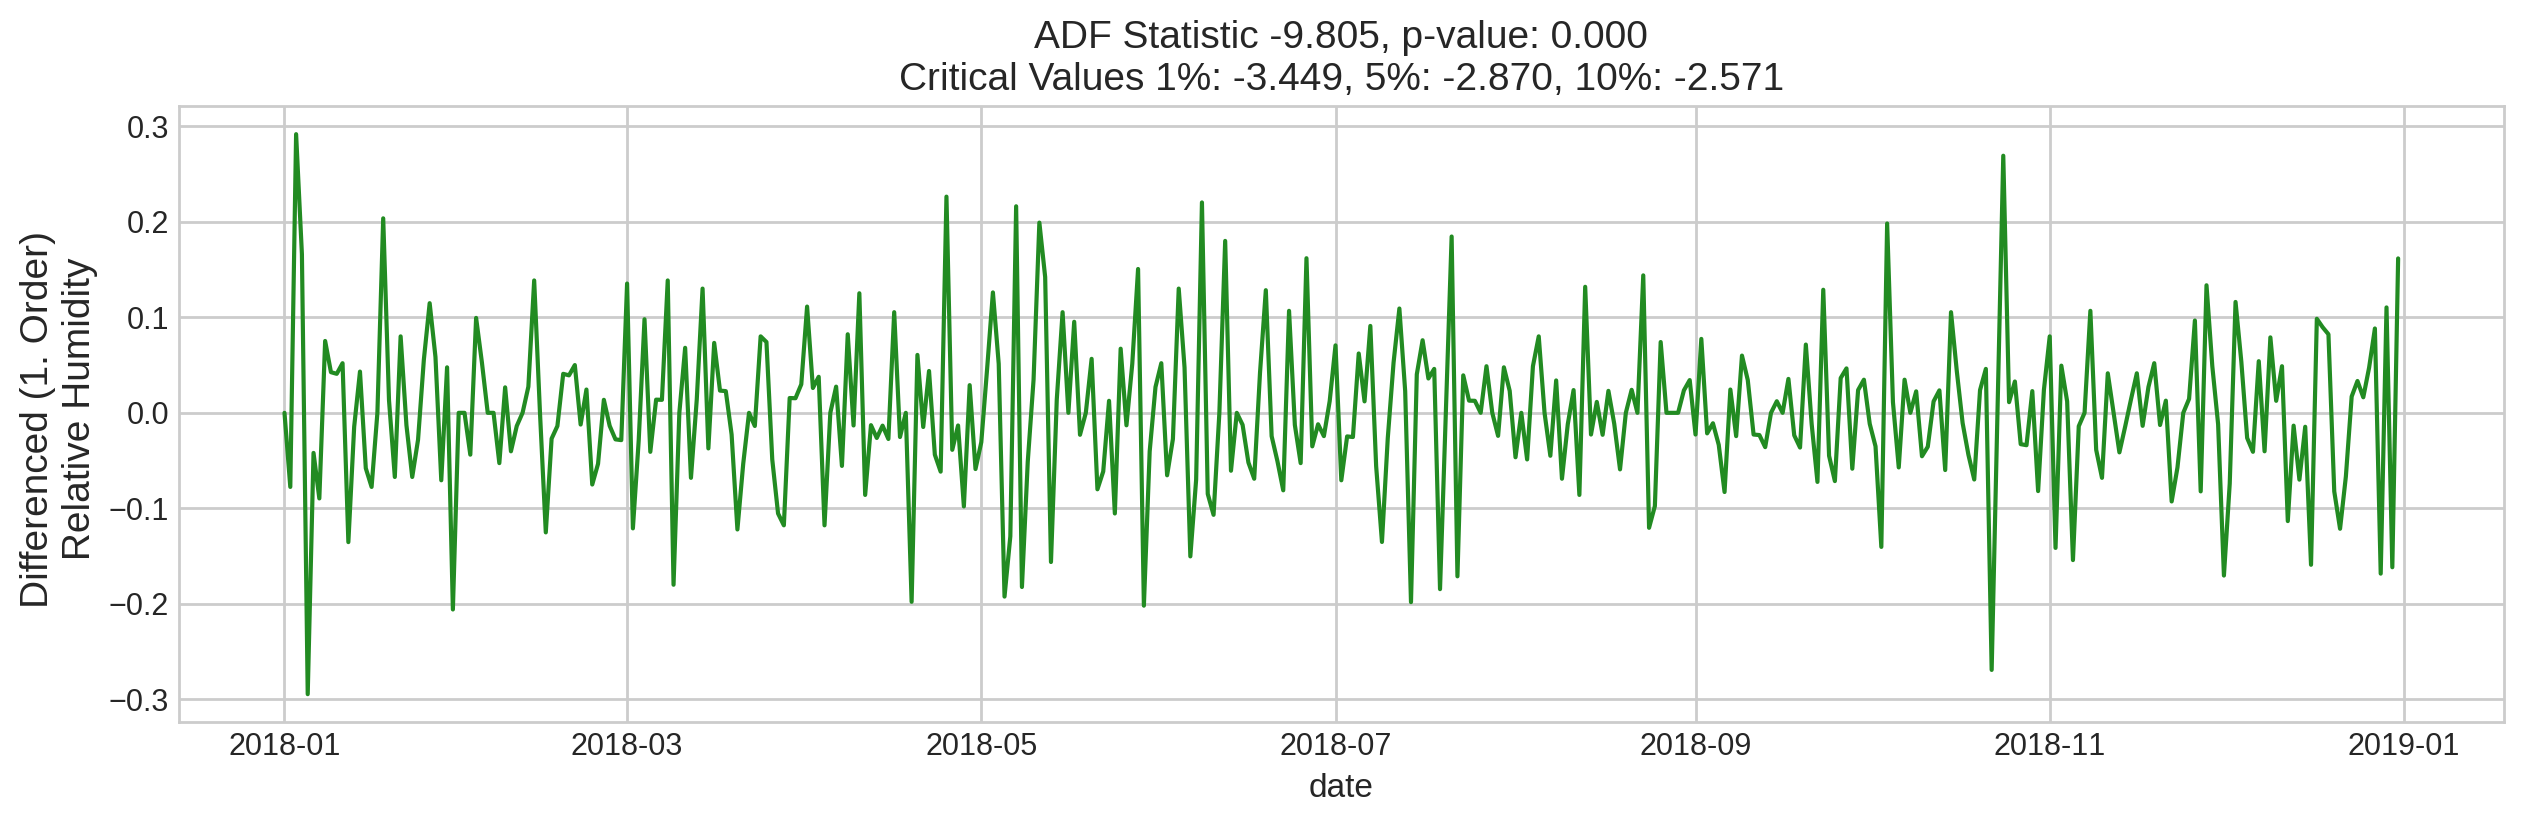

In [ ]:
# First Order Differencing
rh_diff = np.diff(df['rh'])
df['rh_diff_1'] = np.append([0], rh_diff)

f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 4))
visualize_adfuller_results(df['rh_diff_1'], 'Differenced (1. Order) \n Relative Humidity', ax)

Differencing can be done in different orders:

- First order differencing: linear trends with (search for the formula)
- Second-order differencing: quadratic trends with (search for the formula)
and so on...


**Interpretation:**

**IV. Decomposition of Timeseries**

- Decompostion helps to determine the seasonality and trend the data it will calculates the trend other input and plot it seperately in graph so that we can visualize it easily.

In [18]:
# Use date time index to use the actual date but this is not always applicable if the data is to long.
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

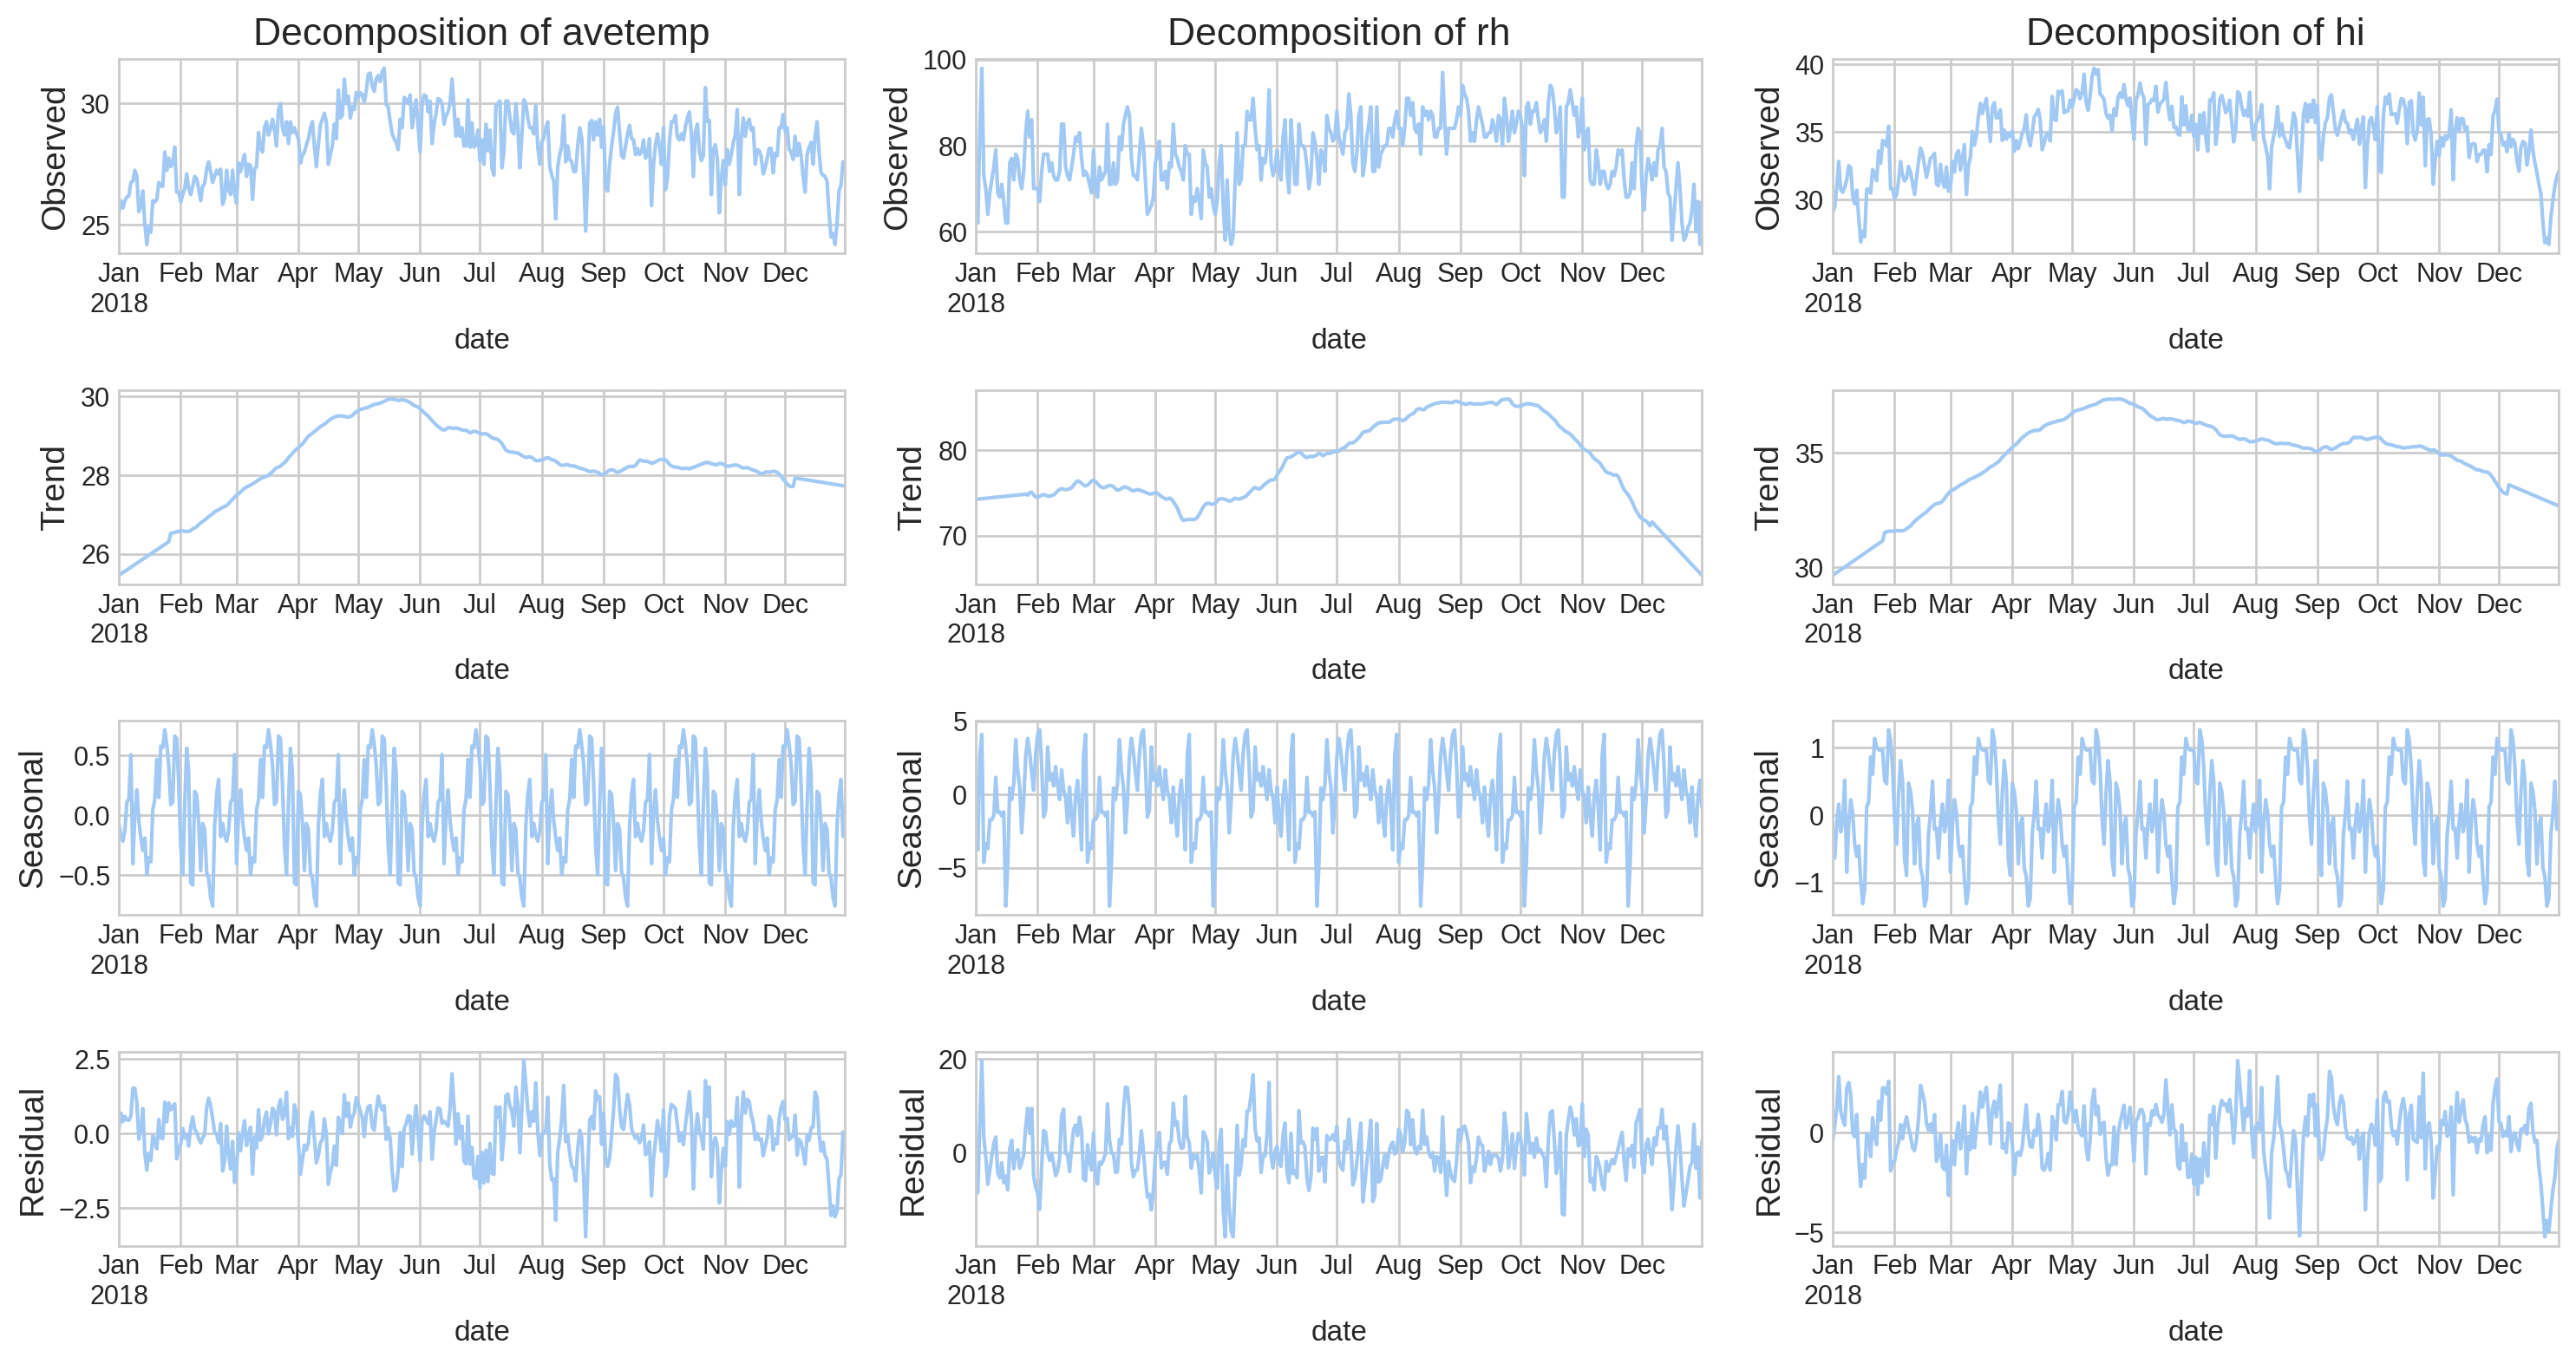

In [19]:
#Decomposing TimeSeries
columns = ['avetemp', 'rh', 'hi']

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(15, 8))

for i, column in enumerate(columns):
    res = seasonal_decompose(df[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0, i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0, i], legend=False)
    ax[0, i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1, i], legend=False)
    ax[1, i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2, i], legend=False)
    ax[2, i].set_ylabel('Seasonal', fontsize=14)

    res.resid.plot(ax=ax[3, i], legend=False)
    ax[3, i].set_ylabel('Residual', fontsize=14)

plt.tight_layout()
plt.show()


**Interpretation**


**V. Correlation**

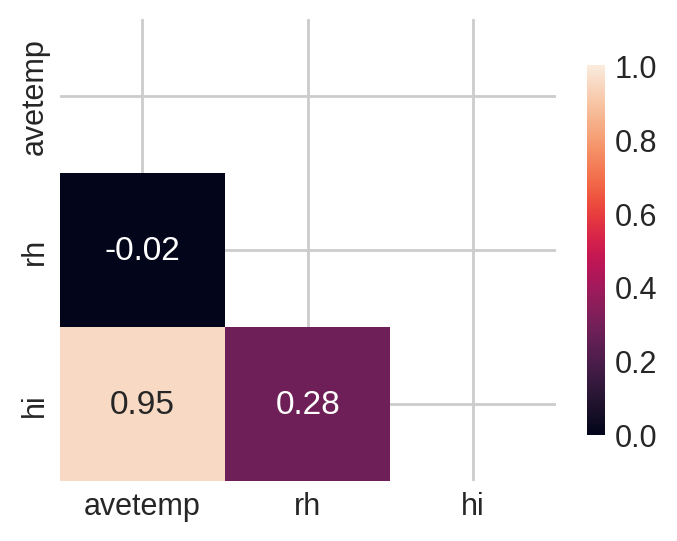

In [20]:
# Plotting correlation heatmap of the dataset
corr=df[columns].corr()
mask= np.triu(np.ones_like(corr,dtype=np.bool))
fig,ax= plt.subplots(figsize=(4,3))
sns.heatmap(corr,mask=mask, annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)
None

**Interpretation:**

**Conclusion**

> You can now summarize what was the statistics of the data in 2018 suggest you can focus on the data distribution above and in the decomposition.

> You also Focus on the heat index results as needed.

> Always focus on the main question you to answer. If that is to understand by comparing the  data distribution above and in the decomposition you can make conclusion for pre and post timeseries data.

In [26]:
# Defining training dataset size (80%)
train_size = int(0.80 * len(df))

In [27]:
# Reset index to make 'date' a regular column
df_reset = df.reset_index()

# Defining univariate DataFrame - Target = Sunspots counts
univariate_df = df_reset[['date', 'hi']].copy()
univariate_df.columns = ['ds', 'y']


In [28]:
# Train - Validation split
train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

In [ ]:
!pip install pmdarima --q

In [32]:
# Machine learning models and utilities
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict
import pmdarima as pm
from prophet import Prophet
import math
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [33]:
# Tunning ARIMA model with AutoArima
model = pm.auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',
                      max_p=3, max_q=3,
                      m=1,
                      d=None,
                      seasonal=False,
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1044.758, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1031.951, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1017.831, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1042.814, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=990.625, Time=0.24 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=992.287, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=992.256, Time=0.74 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=994.602, Time=0.39 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1019.513, Time=0.26 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=993.572, Time=1.73 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=990.255, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1016.079, Time=0.27 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1030.051, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=991.808, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AI

In [36]:
# Defining and fiting ARIMA model
model = ARIMA(y_train, order=(1,1,1),trend='t')
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  292
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -491.313
Date:                Tue, 23 Jan 2024   AIC                            990.625
Time:                        12:26:24   BIC                           1005.318
Sample:                             0   HQIC                           996.511
                                - 292                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0199      0.016      1.258      0.208      -0.011       0.051
ar.L1          0.4925      0.073      6.772      0.000       0.350       0.635
ma.L1         -0.9050      0.036    -25.086      0.0

In [38]:
# Prediction with ARIMA
y_pred = model_fit.forecast(73)
score_mae = mean_absolute_error(y_valid, y_pred)
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred))

print('RMSE: {}'.format(score_rmse))

RMSE: 4.167720459974715


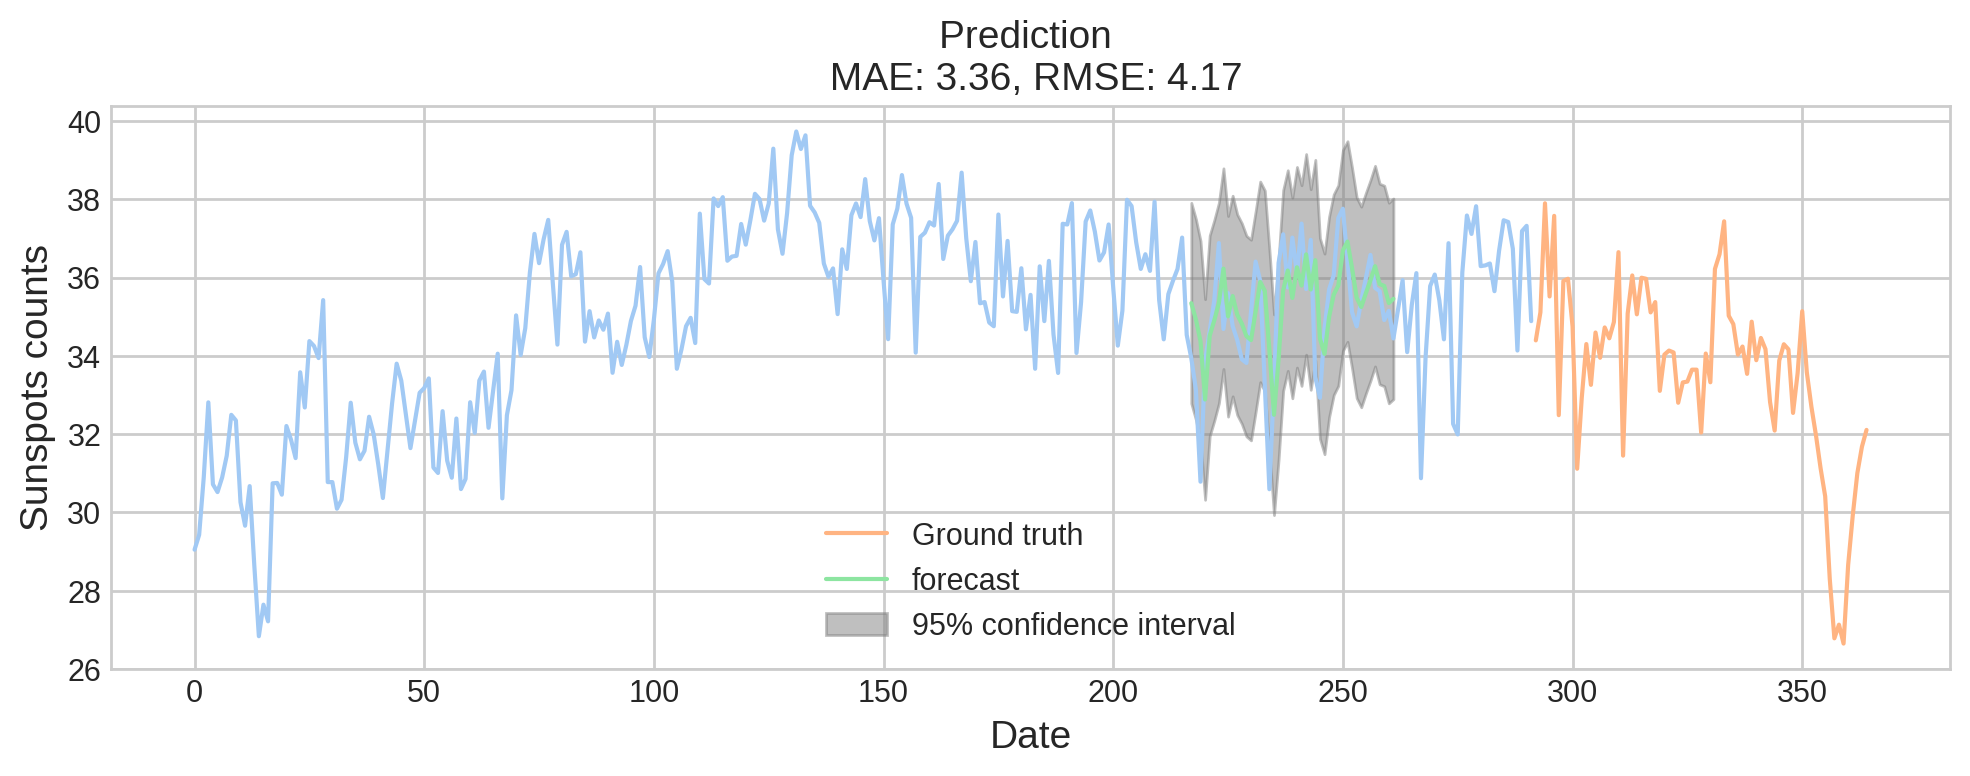

In [41]:
# Plotting forecast - ARIMA univariate analysis
fig, ax = plt.subplots(figsize=(10, 4))

sns.lineplot(x=x_train.index, y=y_train['y'], ax=ax)
sns.lineplot(x=x_valid.index, y=y_valid['y'], ax=ax, label='Ground truth')
plot_predict(model_fit,217, 261, ax=ax)

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Heat Index', fontsize=14)

plt.tight_layout()

In [52]:
# Defining multivariate Dataframe - Target = Sunspots Counts
features= ['rh',
          'avetemp']

target=['hi']

# Reset index to make 'date' a regular column
df_reset = df.reset_index()

multivariate_df= df_reset[['date'] + target + features].copy()
multivariate_df.columns = ['ds', 'y'] + features

multivariate_df.head(5).append(multivariate_df.tail(5))

,ds,y,rh,avetemp
0,2018-01-01,29.048,67,25.50
1,2018-01-02,29.428,62,26.00
2,2018-01-03,30.892,83,25.70
3,2018-01-04,32.812,98,26.00
4,2018-01-05,30.717,73,26.15
360,2018-12-27,28.659,71,25.05
361,2018-12-28,29.920,60,26.40
362,2018-12-29,31.003,67,26.65
363,2018-12-30,31.678,57,27.60
364,2018-12-31,32.108,67,27.30


In [55]:
# Train - Validation split
#adjust the train size depends on how many features you have

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

In [56]:
# Train the model
model = Prophet()
model.add_regressor('rh')
model.add_regressor('avetemp')
# add feature model it you have multiple features

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print('RMSE: {}'.format(score_rmse))

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxgolp2l/jxkmqr6o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdxgolp2l/vfu4ufsp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72996', 'data', 'file=/tmp/tmpdxgolp2l/jxkmqr6o.json', 'init=/tmp/tmpdxgolp2l/vfu4ufsp.json', 'output', 'file=/tmp/tmpdxgolp2l/prophet_modelqdy62t07/prophet_model-20240123123342.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:33:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:33:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 0.0004412170279017484


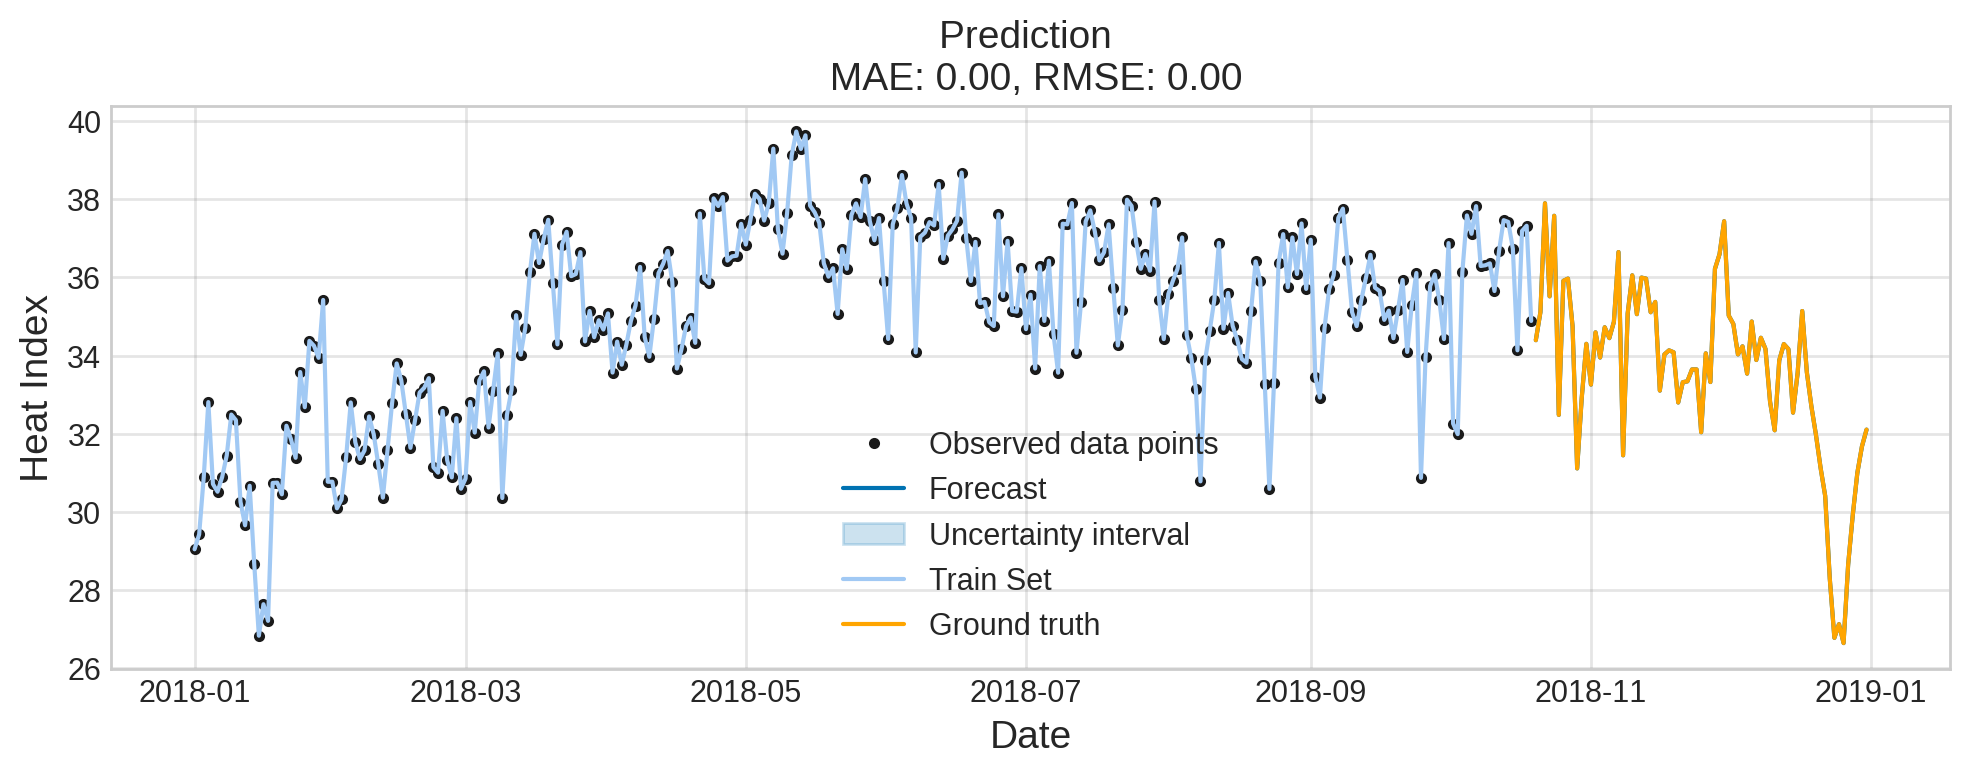

In [57]:
# Plotting forecast - Prophet multivariate analysis
fig, ax = plt.subplots(figsize=(10, 4))

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_train['ds'], y=y_train['y'], ax=ax, label='Train Set')
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth')

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Date', fontsize=14)
ax.set_ylabel(ylabel='Heat Index', fontsize=14)

plt.tight_layout()